# Multiclass classification
---------------------------------

This example shows how to compare the performance of three models on a multiclass classification task.

Import the wine dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-dataset). This is a small and easy to train dataset whose goal is to predict wines into three groups (which cultivator it's from) using features based on the results of chemical analysis.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_wine
from atom import ATOMClassifier

In [2]:
# Load the dataset's features and targets
X, y = load_wine(return_X_y=True, as_frame=True)

# Let's have a look at the data
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Run the pipeline

In [3]:
atom = ATOMClassifier(X, y, n_jobs=-1, warnings='ignore', verbose=2, random_state=1)

# Fit the pipeline with the selected models
atom.run(
    models=['LR','LDA', 'RF'],
    metric='roc_auc_ovr',
    n_calls=4,
    n_initial_points=3,
    bo_params={'base_estimator': 'rf', 'max_time': 100},
    bagging=5
)

<< ================== ATOM ================== >>
Algorithm task: multiclass classification.
Parallel processing with 16 cores.

Dataset stats ================== >>
Shape: (178, 14)
Scaled: False
-----------------------------------
Train set size: 143
Test set size: 35
-----------------------------------
Train set balance: 0:1:2 <==> 1.4:1.7:1.0
Test set balance: 0:1:2 <==> 1.0:1.4:1.4
-----------------------------------
Distribution of classes:
|    |   dataset |   train |   test |
|---:|----------:|--------:|-------:|
|  0 |        59 |      50 |      9 |
|  1 |        71 |      58 |     13 |
|  2 |        48 |      35 |     13 |


Training ===================================== >>
Models: LR, LDA, RF
Metric: roc_auc_ovr


Running BO for Logistic Regression...
Initial point 1 ---------------------------------
Parameters --> {'penalty': 'l2', 'C': 46.003, 'solver': 'lbfgs', 'max_iter': 745}
Evaluation --> roc_auc_ovr: 1.0000  Best roc_auc_ovr: 1.0000
Time iteration: 0.000s   Total time:

## Analyze the results

In [4]:
# We can access the pipeline's results via the results attribute
atom.results

,metric_bo,time_bo,metric_train,metric_test,time_fit,mean_bagging,std_bagging,time_bagging,time
model,,,,,,,,,
LR,1,0.000s,1,0.996503,0.000s,0.994172,0.00255349,0.000s,0.000s
LDA,1,0.000s,1,1,0.000s,0.999767,0.0004662,0.000s,0.000s
RF,0.992716,0.000s,0.999654,0.980186,0.000s,0.974022,0.00735105,0.000s,0.000s


In [5]:
# Show the scoring for a different metric than the one we trained on
atom.scoring('precision_macro')

Results ===================== >>
Logistic Regression          --> precision_macro: 0.949
Linear Discriminant Analysis --> precision_macro: 1.0
Random Forest                --> precision_macro: 0.919


**Let's have a closer look at the Random Forest**

In [6]:
# Get the results on some other metrics
print('Jaccard score:', atom.rf.scoring('jaccard_weighted'))
print('Recall score:', atom.rf.scoring('recall_macro'))

Jaccard score: 0.8428571428571429
Recall score: 0.923076923076923


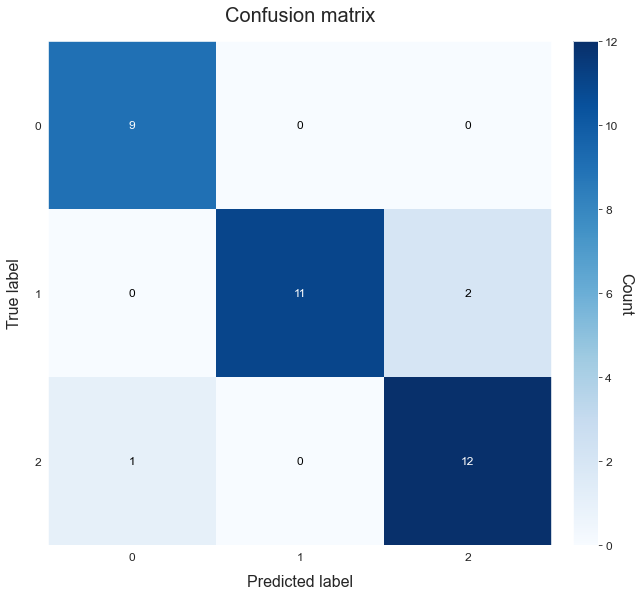

In [7]:
# Plot the confusion matrix
atom.RF.plot_confusion_matrix(figsize=(9, 9))

In [8]:
# Save the estimator as a pickle file
atom.RF.save_estimator('Random_Forest_model')

Random Forest estimator saved successfully!
